In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [3]:
import random
words = open('Indian_Names.txt', 'r').read().splitlines()

random.shuffle(words)
words = [w.lower() for w in words]
words[:8]

['dhaaran',
 'amarkali',
 'shathan',
 'keeran',
 'tashvithan',
 'dia',
 'kumbha',
 'ayasha']

In [4]:

len(words)

53982

In [6]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [7]:
print(len(itos))

27


In [42]:

# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  
  # print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [92]:

# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([390245, 3]) torch.Size([390245])
torch.Size([48747, 3]) torch.Size([48747])
torch.Size([49082, 3]) torch.Size([49082])


In [77]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([488074, 3]), torch.int64, torch.Size([488074]), torch.int64)

In [78]:
C =  torch.randn((27,2))

In [11]:
emb = C[X]
emb.shape

torch.Size([43, 3, 2])

In [12]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [13]:
h = torch.tanh(emb.view(-1,6) @ W1+b1)

In [14]:
h

tensor([[-0.7724,  0.1347, -0.1675,  ..., -0.9656,  0.8430, -0.4393],
        [-0.9588,  0.5098,  0.1689,  ..., -0.7117,  0.9384, -0.5408],
        [-0.7622, -0.8582,  0.0467,  ..., -0.4913,  0.9870, -0.9787],
        ...,
        [ 0.8356, -0.3633,  0.1608,  ..., -0.6526,  0.6866, -0.9995],
        [-0.9870,  0.6177, -0.4661,  ...,  0.9994,  0.9973, -0.3450],
        [ 0.9190,  0.9998, -0.9084,  ...,  0.9978,  0.9940, -0.9722]])

In [15]:
h.shape

torch.Size([43, 100])

In [16]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [17]:
logits = h @ W2 + b2
logits.shape

torch.Size([43, 27])

In [18]:
counts = logits.exp()

In [19]:
prob = counts/counts.sum(1,keepdims=True)

In [20]:
prob.shape

torch.Size([43, 27])

In [21]:
Y

tensor([ 4,  8,  1,  1, 18,  1, 14,  0,  1, 13,  1, 18, 11,  1, 12,  9,  0, 19,
         8,  1, 20,  8,  1, 14,  0, 11,  5,  5, 18,  1, 14,  0, 20,  1, 19,  8,
        22,  9, 20,  8,  1, 14,  0])

In [22]:
loss = -prob[torch.arange(len(Y)), Y].log().mean()
loss

tensor(15.4593)

In [23]:
# -------------- all puttogether ------------------

In [116]:
Xtr.shape, Ytr.shape

(torch.Size([390245, 3]), torch.Size([390245]))

In [134]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [135]:
sum(p.nelement() for p in parameters)

11897

In [136]:
for p in parameters:
    p.requires_grad = True

In [61]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [146]:
lri = []
lossi = []
stepi = []

for i in range(50000):

    ix = torch.randint(0, Xtr.shape[0], (32,)) # batch of 32 random indices
    #forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None # zero the gradients
    loss.backward()

    # update parameters
    # lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad # gradient descent step

    # lri.append(lre[i])
    lossi.append(loss.log10().item())
    stepi.append(i)

# print(loss.item())

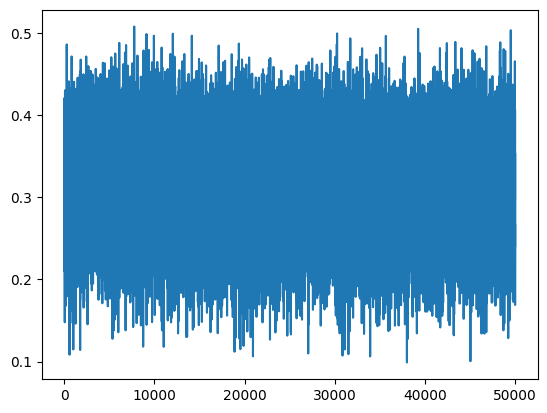

In [147]:
plt.plot(stepi, lossi)

In [148]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0728, grad_fn=<NllLossBackward0>)

In [149]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.0781, grad_fn=<NllLossBackward0>)

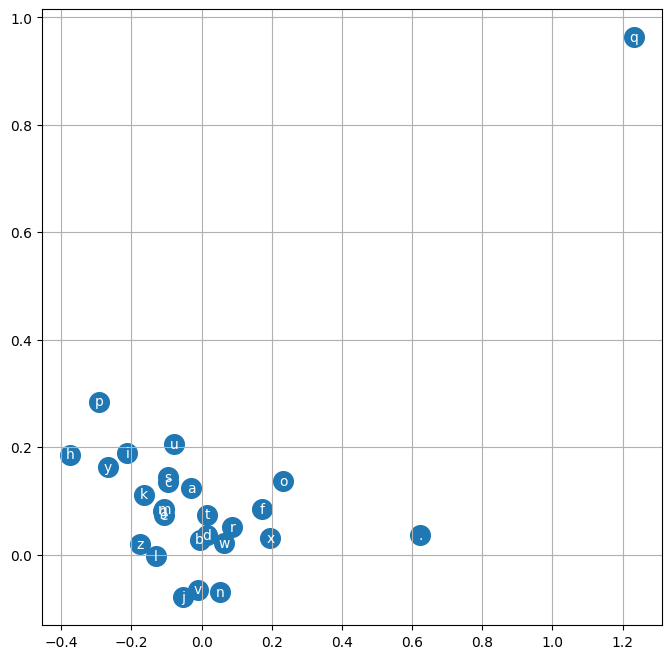

In [150]:

# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

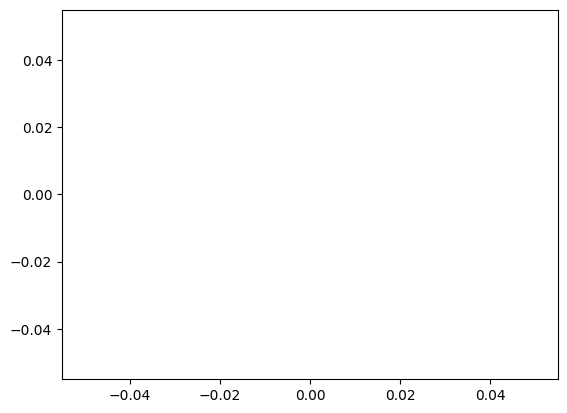

In [100]:
plt.plot(lri, lossi)

In [151]:

# training split, dev/validation split, test split
# 80%, 10%, 10%

In [152]:

# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

chamavi.
abhilvithimrughanthanathasanjanthina.
priyathigeni.
neethithamaihi.
kanajeya.
bhan.
indeshan.
sulinaa.
van.
iswantha.
dearthikakasunivulthes.
edoiptatasantharanasasaman.
hisya.
pumara.
zewthajeni.
kasrannakpaladhulokeet.
sukarakshini.
amoklithran.
kavinanan.
ruvi.
